# Data Preparation

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [2]:
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [5]:
df = pd.merge(X, y, left_index=True, right_index=True)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [9]:
(df.isna().sum()/len(df))*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
num         0.000000
dtype: float64

In [10]:
df = df.dropna()
(df.isna().sum()/len(df))*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


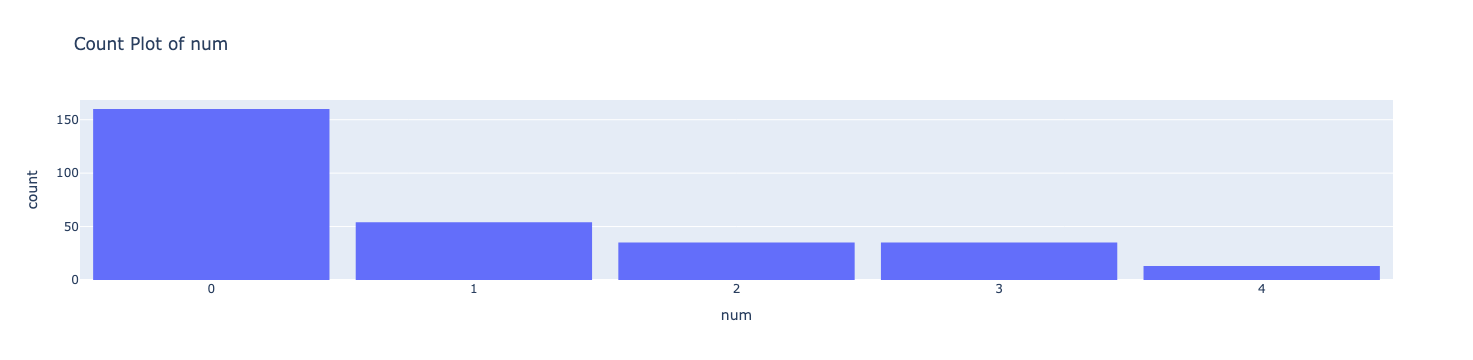

In [19]:
# Assuming df is your DataFrame and 'num' is the column you want to visualize
fig = px.histogram(df, x='num', nbins=5, title="Count Plot of num", labels={'num': 'num'})
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
# Add a "Target" column, if num is [1,2,3,4] thus it is 1 meaning presence of heart disease
# 0 meaning absence of heart disease
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


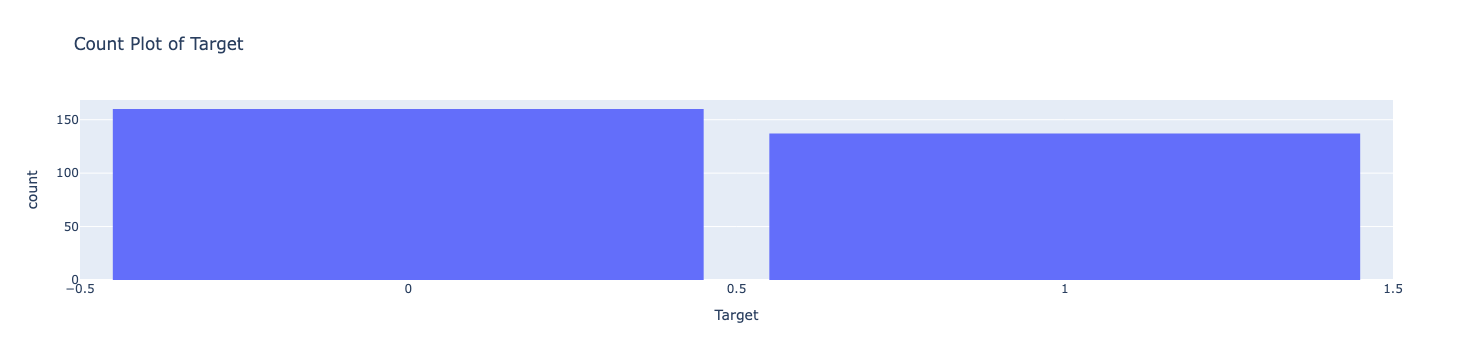

In [14]:
# Assuming df is your DataFrame and 'num' is the column you want to visualize
fig = px.histogram(df, x='target', nbins=2, title="Count Plot of Target", labels={'target': 'Target'})
fig.update_layout(bargap=0.1)
fig.show()

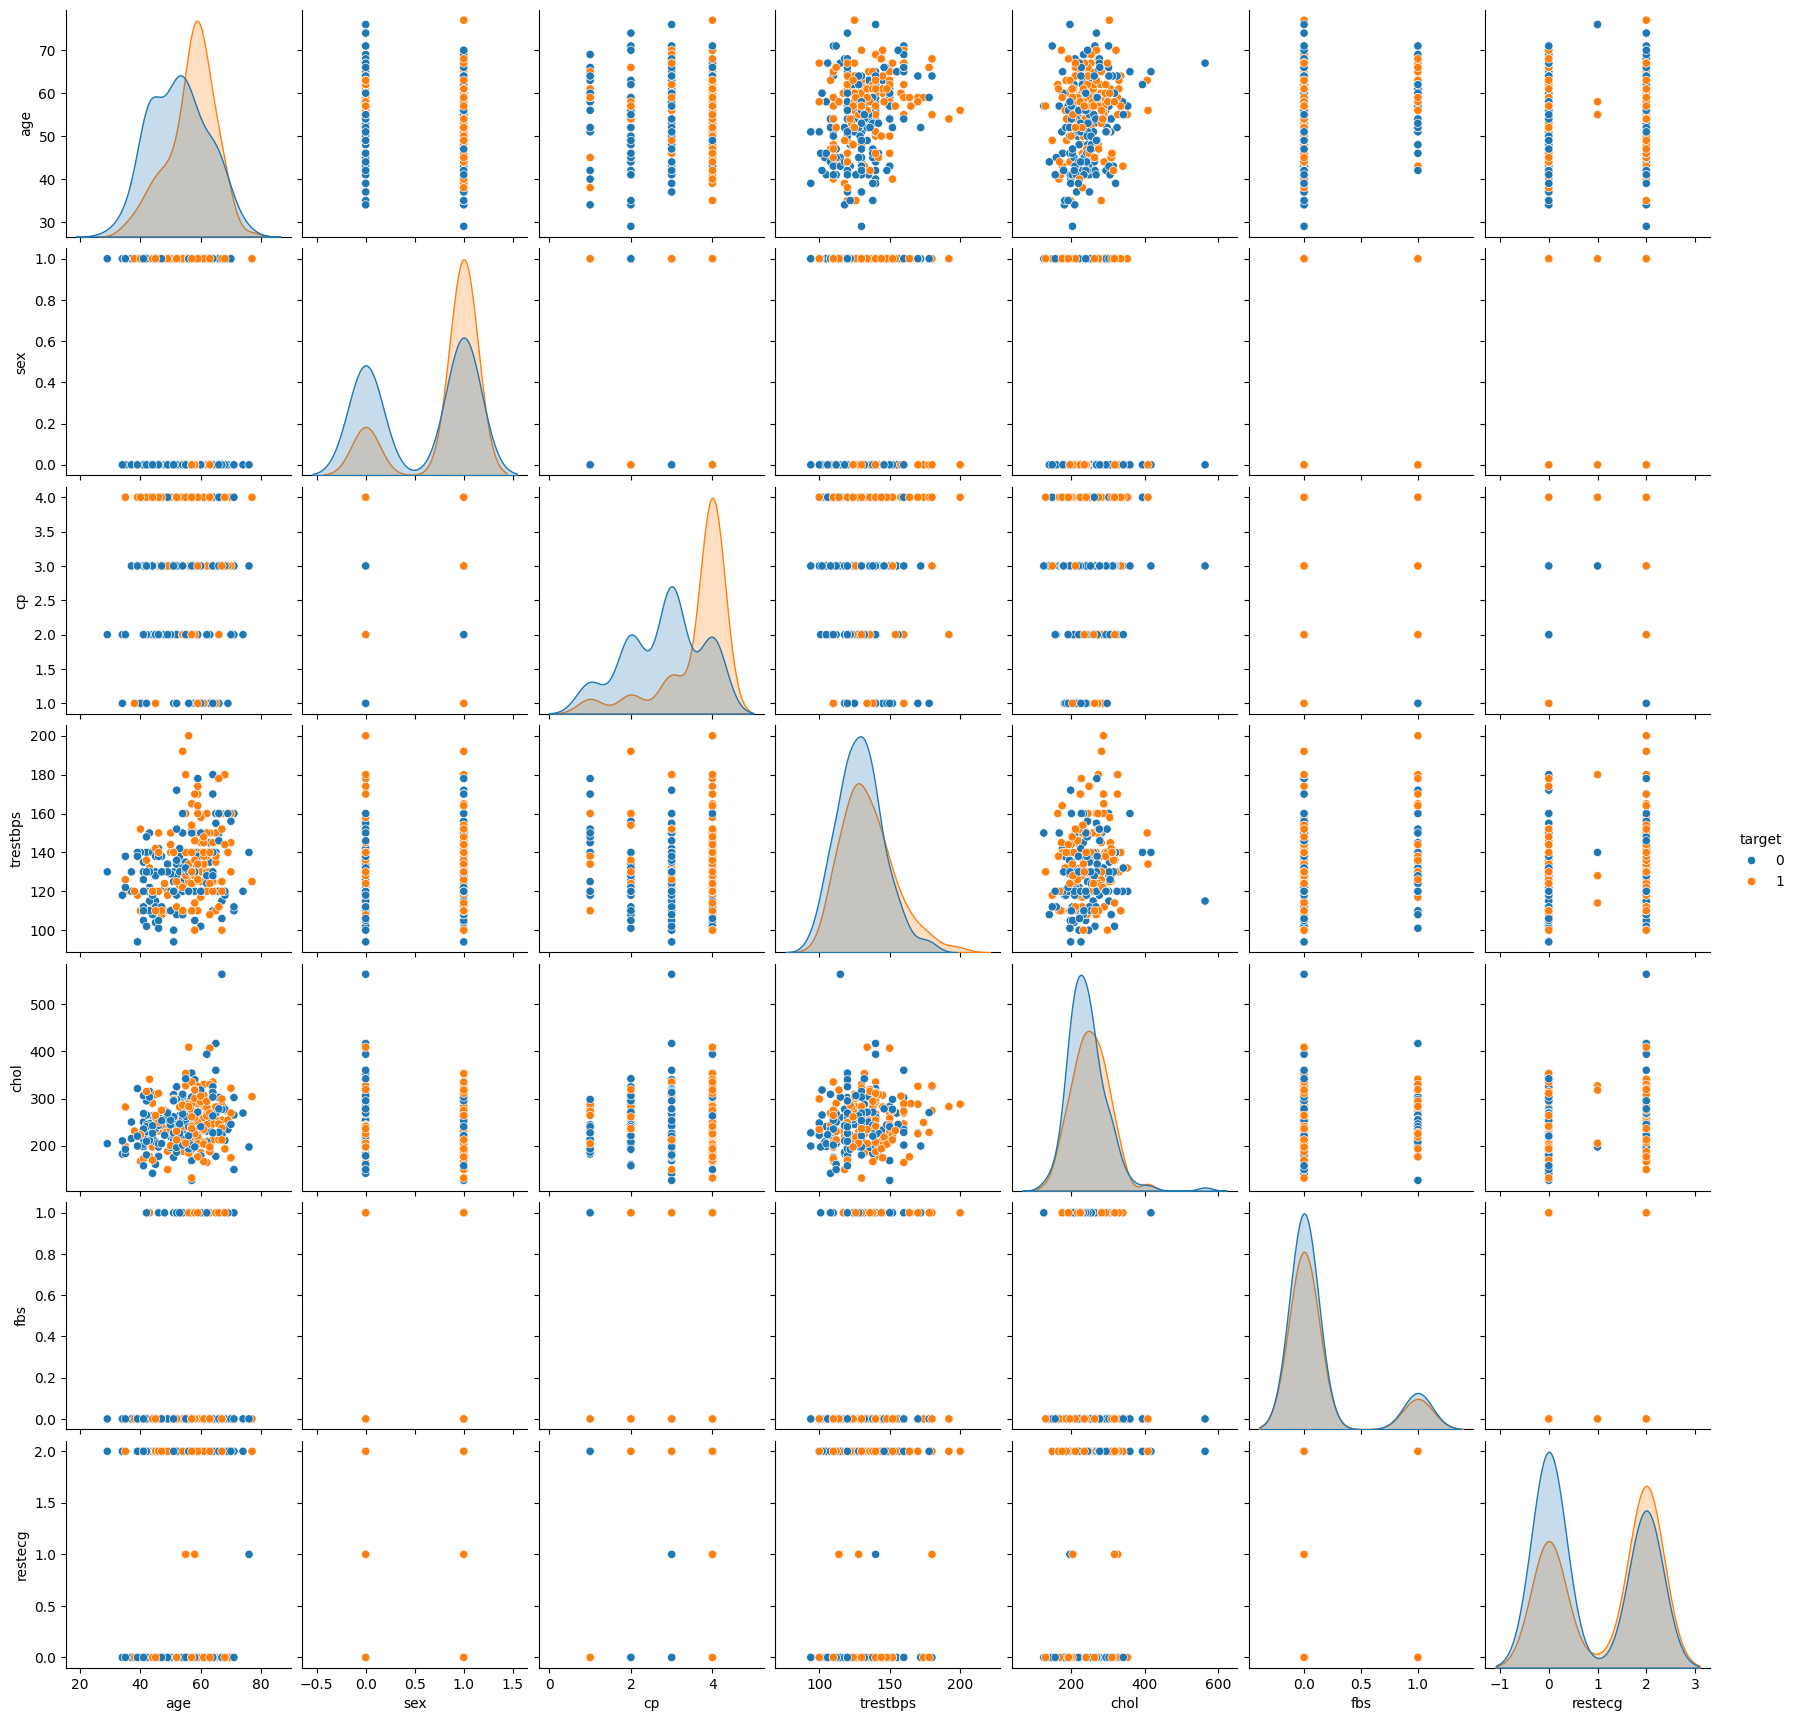

In [15]:
# Calculate the midpoint index to split the DataFrame columns into two groups
midpoint = len(df.columns) // 2 

# Split the DataFrame columns by index, excluding the 'num' column
vars_group1 = df.columns[:midpoint]
vars_group2 = df.columns[midpoint:-2]

# Create the first pairplot with the first group of variables
pairplot1 = sns.pairplot(df[list(vars_group1) + ['target']], hue='target')
plt.show()

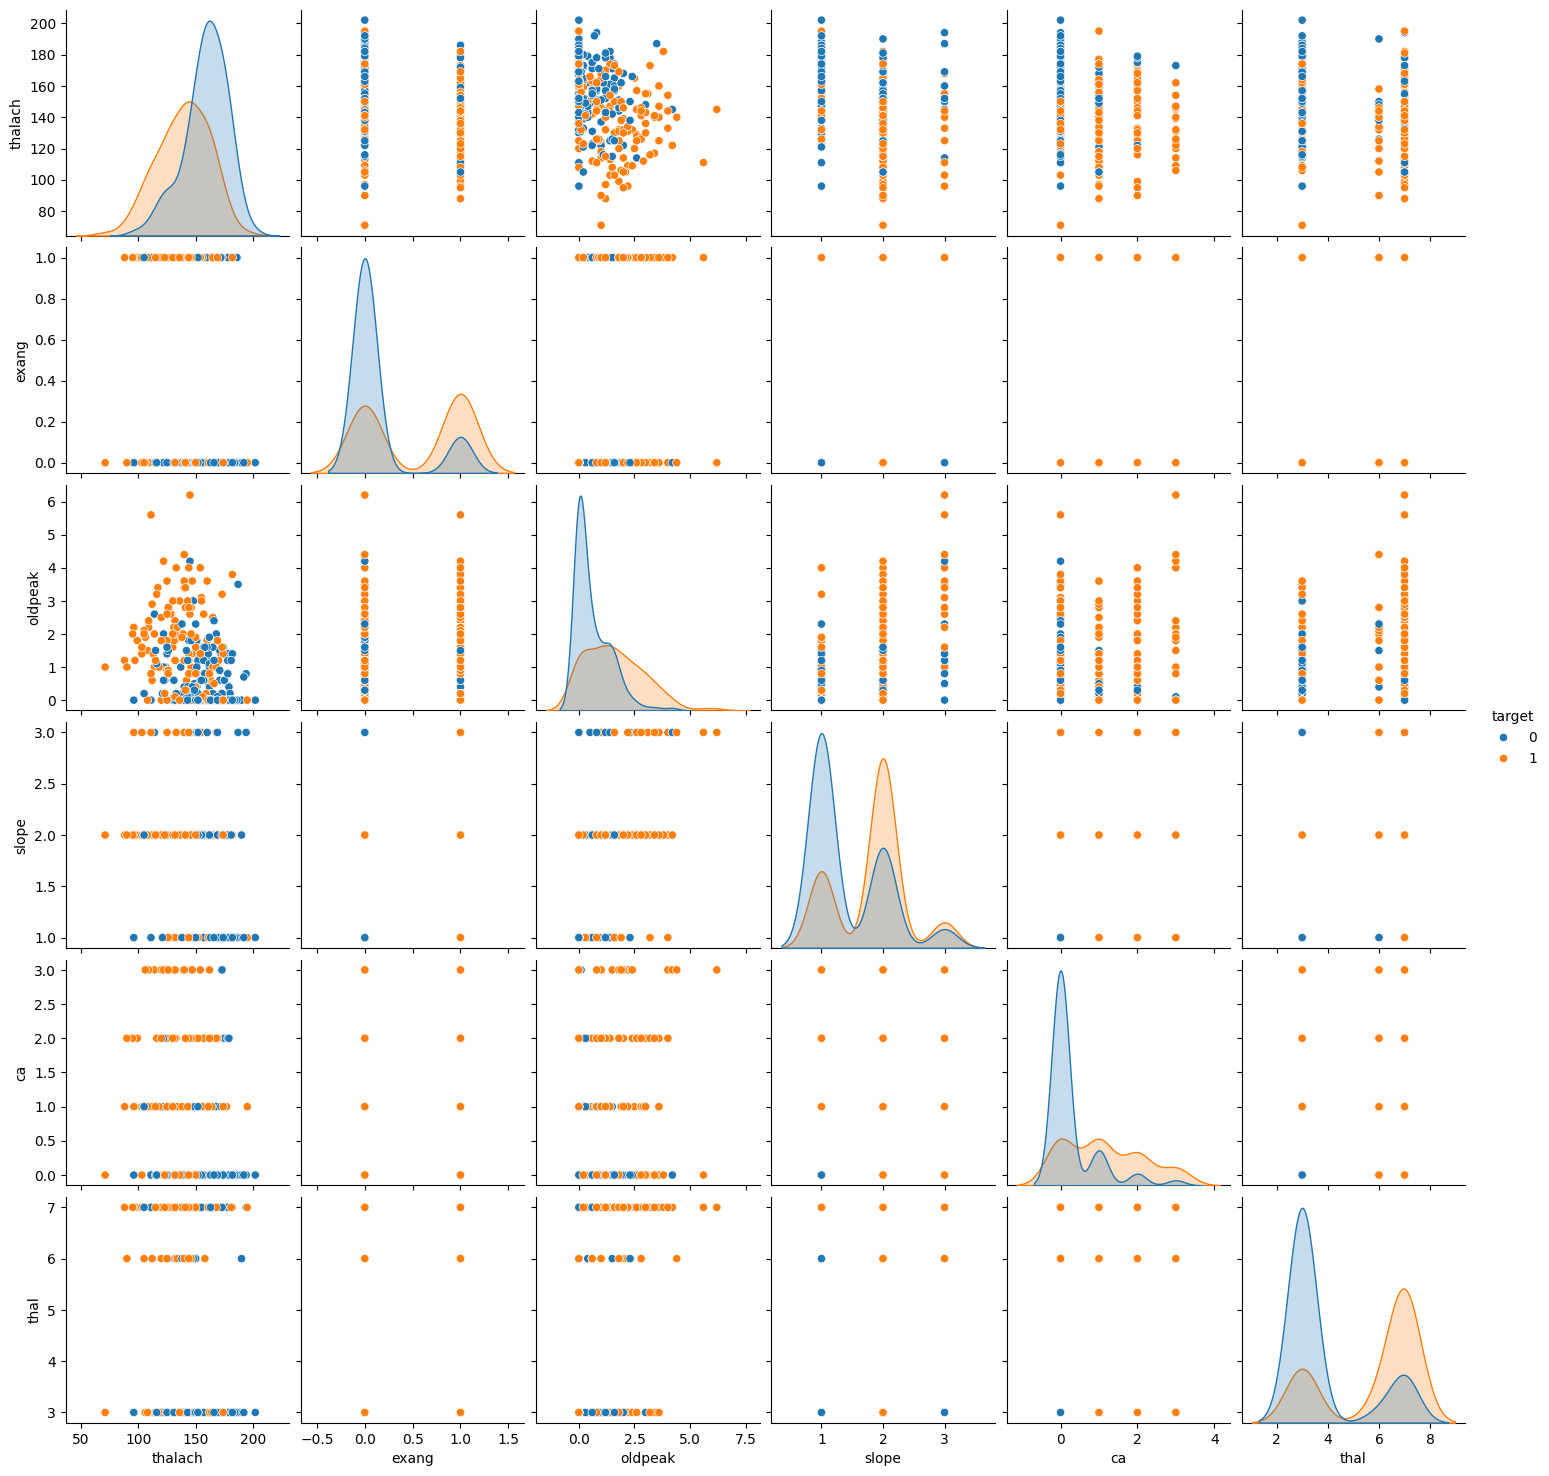

In [16]:
# Create the second pairplot with the second group of variables
pairplot2 = sns.pairplot(df[list(vars_group2) + ['target']], hue='target')
plt.show()

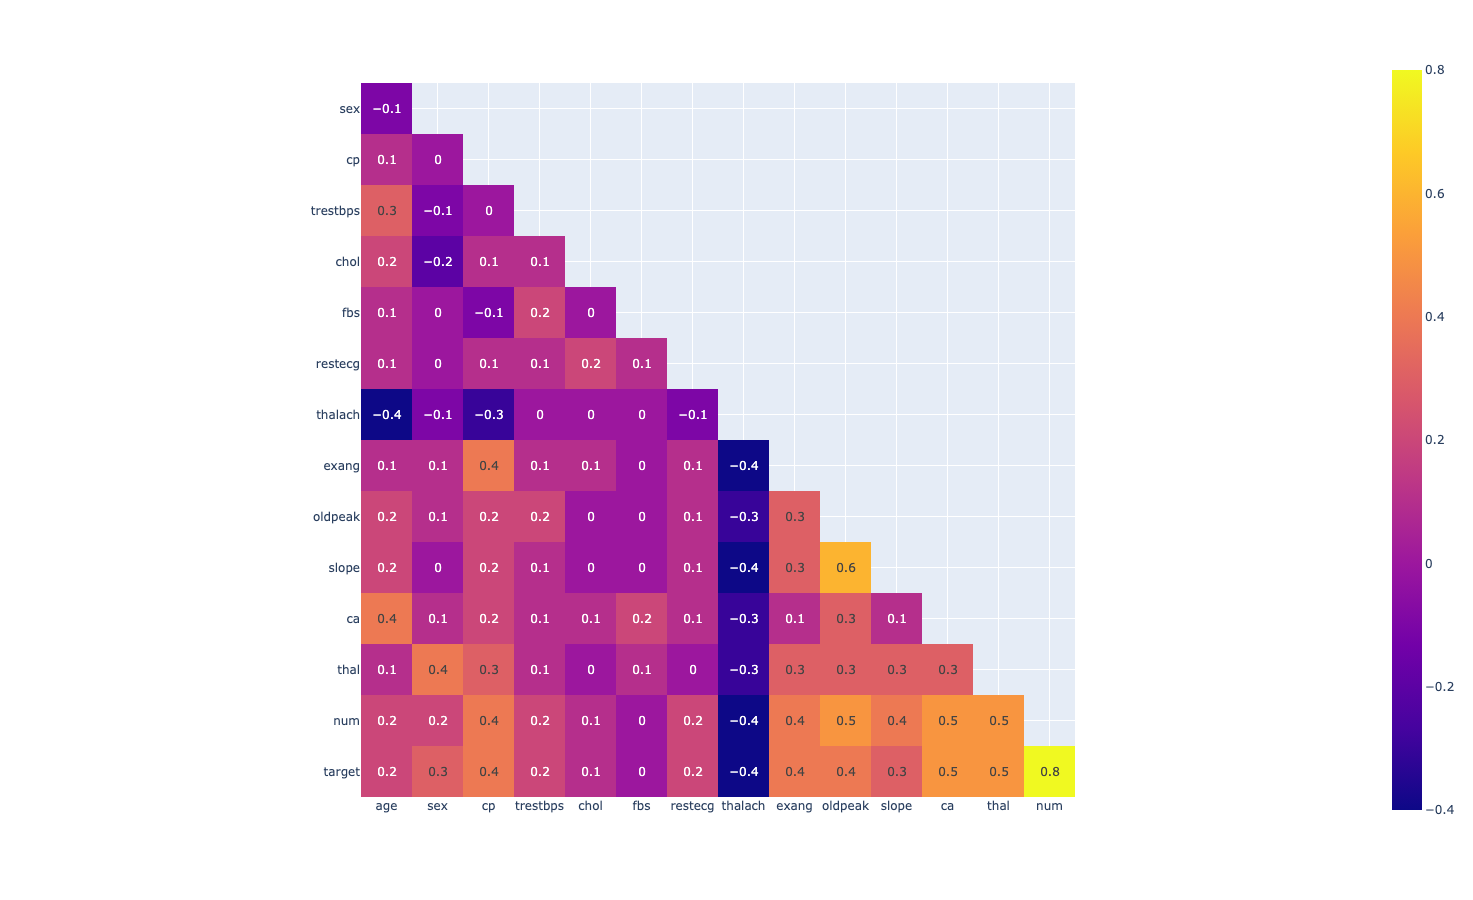

In [17]:
numeric_df = df

# check for correlation
df_corr = numeric_df.corr().round(1)  

# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Apply the mask to the correlation matrix and then drop rows and columns with all NaN values
df_corr_viz = df_corr.mask(mask)
df_corr_viz = df_corr_viz.dropna(axis=0, how='all') 
df_corr_viz = df_corr_viz.dropna(axis=1, how='all')  

# Heat Map
fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height=900, width=900)
fig.show()

# Train | Test Split and Scaling

In [20]:
X = df.drop(["num","target"],axis=1)
y = df['target']

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [23]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegressionCV

In [40]:
log_model = LogisticRegressionCV()

In [41]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [63]:
print("Best C value:", log_model.C_[0])

Best C value: 0.005994842503189409


# Coefficients

In [48]:
coef = list(log_model.coef_[0])
coef

[0.07157118549575577,
 0.12359612824427034,
 0.1860659038349421,
 0.07653852711381041,
 0.03665273876804001,
 -0.022661629715700682,
 0.06659086385660985,
 -0.16323165168953638,
 0.16661922232533508,
 0.15181159252597015,
 0.11031797099492595,
 0.19992184131829707,
 0.22186997419742596]

In [49]:
names = list(df.columns)
names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num',
 'target']

In [50]:
OR = {}
for key in names:
    for value in coef:
        OR[key] = value
        coef.remove(value)
        break
OR

{'age': 0.07157118549575577,
 'sex': 0.12359612824427034,
 'cp': 0.1860659038349421,
 'trestbps': 0.07653852711381041,
 'chol': 0.03665273876804001,
 'fbs': -0.022661629715700682,
 'restecg': 0.06659086385660985,
 'thalach': -0.16323165168953638,
 'exang': 0.16661922232533508,
 'oldpeak': 0.15181159252597015,
 'slope': 0.11031797099492595,
 'ca': 0.19992184131829707,
 'thal': 0.22186997419742596}

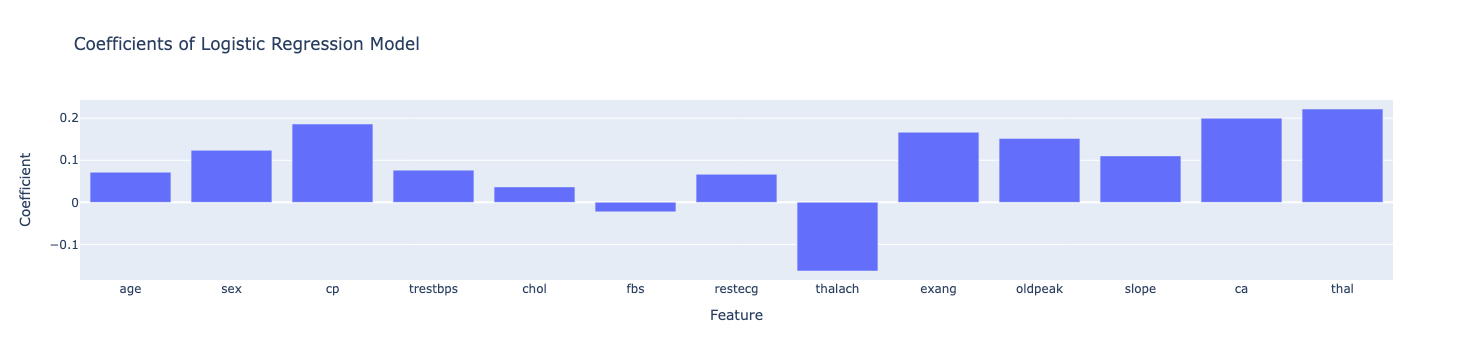

In [54]:
OR_df = pd.DataFrame(list(OR.items()), columns=['Feature', 'Coefficient'])

# Create a bar plot of the coefficients
fig = px.bar(OR_df, x='Feature', y='Coefficient', title='Coefficients of Logistic Regression Model')
fig.show()

# Model Performance Evaluation

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [65]:
y_pred = log_model.predict(scaled_X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.7333333333333333

In [67]:
confusion_matrix(y_test,y_pred)

array([[7, 1],
       [3, 4]])

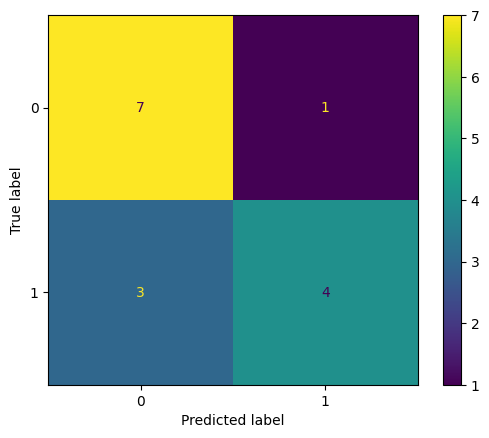

In [68]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

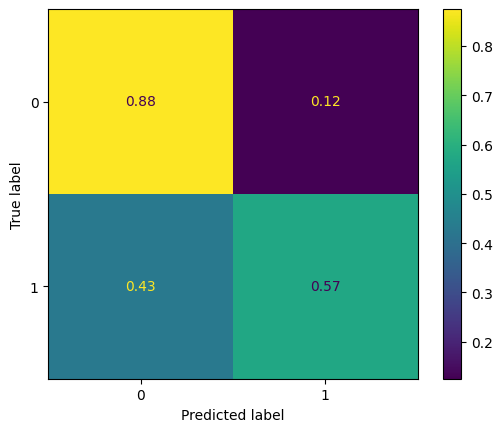

In [69]:
# Scaled so highest value=1
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true')

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15



In [71]:
X_train.iloc[0]

age          67.0
sex           0.0
cp            3.0
trestbps    152.0
chol        277.0
fbs           0.0
restecg       0.0
thalach     172.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            1.0
thal          3.0
Name: 227, dtype: float64

In [72]:
y_train.iloc[0]

0

In [73]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0.53242506, 0.46757494]])

In [74]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([0])

# Evaluating Curves and AUC

In [75]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay,RocCurveDisplay

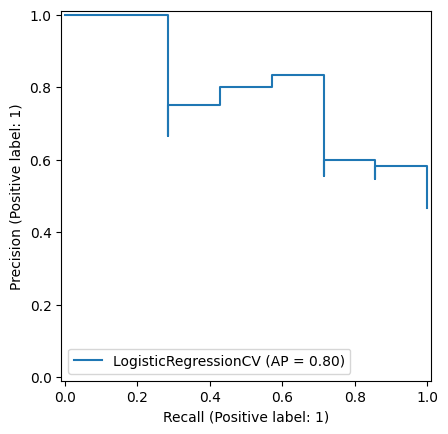

In [76]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)


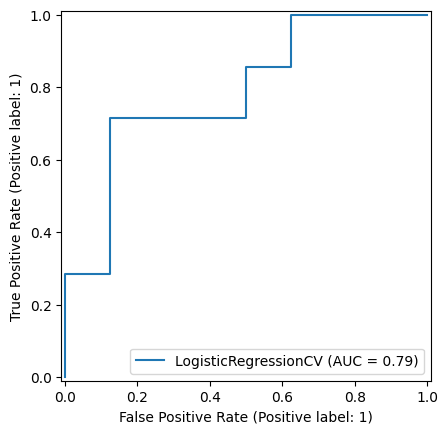

In [77]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)